# Least-Squares Problem Project 

# Fish Market

# 1 Data Description 

Data set ที่นำมาศึกษาคือเรื่อง Fish Market เป็นข้อมูลที่มีเนื้อหาเกี่ยวกับลักษณะต่าง ๆ ของปลา มีข้อมูลทั้งหมด 1 Attribute คือ Species (Species name of fish) และ 6 Features คือ Weight (Weight of fish in gram), Length1 (Vertical length in cm), Length2 (Diagonal length in cm), Length3 (Cross length in cm), Height (Height in cm), Width (Diagonal width in cm) และจะมีข้อมูลตัวอย่างทั้งหมด 159 จำนวน

และผลลัพธ์ที่ต้องการคือการทำนายน้ำหนักปลาด้วยเทคนิค regression แบบต่าง ๆ และนำมาเปรียบเทียบกับน้ำหนักปลาจริง ว่าเทคนิค regression แบบไหนมีความแม่นยำมากที่สุด

# 2 Experiment And Prepare Dataset

นำตัวแปร 1. Length1 (Vertical length in cm) 2. Length2 (Diagonal length in cm) 3. Length3 (Cross length in cm) 4. Height (Height in cm) 5. Width  (Diagonal width in cm) มาใช้ในการทำนาย Weight ของปลา

import module ที่ต้องใช้ในการวิเคราะห์และทำนายข้อมูล

In [526]:
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

import data และเก็บไว้ในตัวแปร df เพื่อใช้ในการแสดงผลข้อมูลและนำข้อมูลไปวิเคราะห์เพื่อทำนายผล

In [527]:
df = pd.read_csv('https://raw.githubusercontent.com/taewsrpy/DSI205/main/Fish.csv')

In [528]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [529]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


ตรวจสอบค่า null

In [531]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [532]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [533]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


# ทำการ Cleaning data โดยการหาค่าที่เป็น outlier และลบออก

In [534]:
def find_outliers_IQR(dataframe):

   Q1=dataframe.quantile(0.25)

   Q3=dataframe.quantile(0.75)

   IQR=Q3-Q1

   outliers = dataframe[((dataframe<(Q1-1.5*IQR)) | (dataframe>(Q3+1.5*IQR)))]

   return outliers

In [535]:
outliers = find_outliers_IQR(df['Weight'])
print(outliers)

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64


Text(0.5, 1.0, 'Outlier Detection')

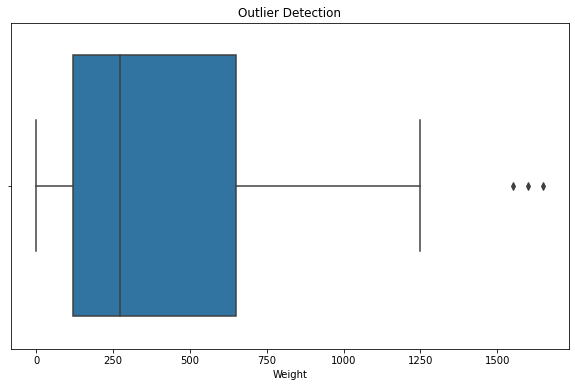

In [536]:
sns.boxplot(x='Weight', data=df)
plt.title('Outlier Detection')

In [537]:
outliers = find_outliers_IQR(df['Length1'])
print(outliers)

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64


Text(0.5, 1.0, 'Outlier Detection')

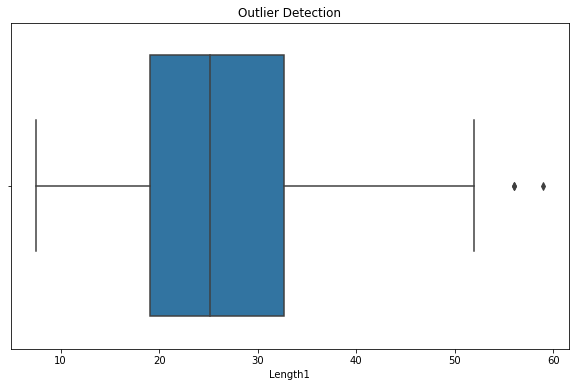

In [538]:
sns.boxplot(x='Length1', data=df)
plt.title('Outlier Detection')

In [539]:
outliers = find_outliers_IQR(df['Length2'])
print(outliers)

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64


Text(0.5, 1.0, 'Outlier Detection')

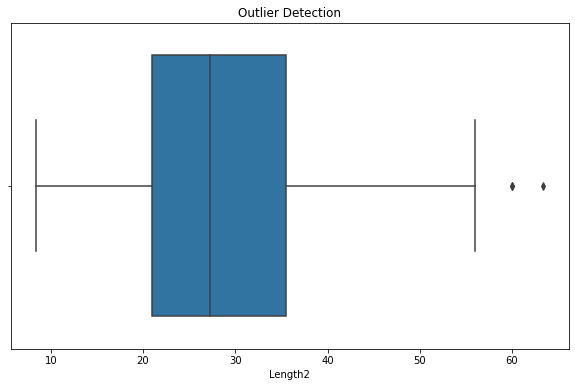

In [540]:
sns.boxplot(x='Length2', data=df)
plt.title('Outlier Detection')

In [541]:
outliers = find_outliers_IQR(df['Length3'])
print(outliers)

144    68.0
Name: Length3, dtype: float64


Text(0.5, 1.0, 'Outlier Detection')

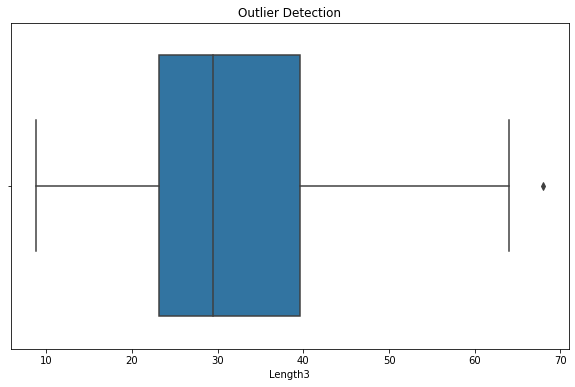

In [542]:
sns.boxplot(x='Length3', data=df)
plt.title('Outlier Detection')

In [543]:
outliers = find_outliers_IQR(df['Height'])
print(outliers)

Series([], Name: Height, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection')

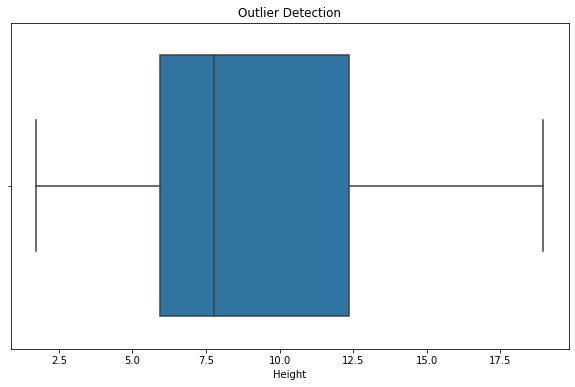

In [544]:
sns.boxplot(x='Height', data=df)
plt.title('Outlier Detection')

In [545]:
outliers = find_outliers_IQR(df['Width'])
print(outliers)

Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection')

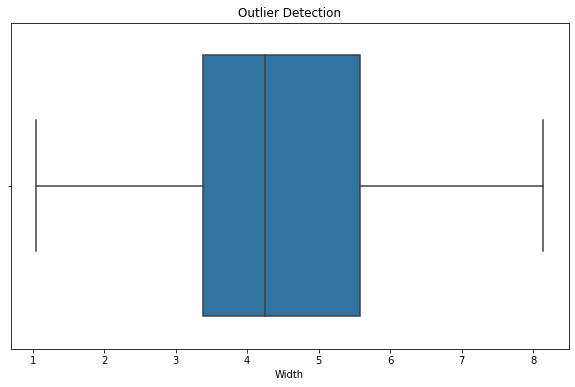

In [546]:
sns.boxplot(x='Width', data=df)
plt.title('Outlier Detection')

In [547]:
df[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


เอา outlier ออก แล้วเก็บข้อมูลไว้ในตัวแปร df1

In [548]:
df1 = df.drop(df.index[[142, 143, 144]])
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [549]:
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


# Model 1 Linear Regression 

คือการวิเคราะห์การถดถอยเชิงเส้น จะเป็นความสัมพันธ์ของตัวแปรหรือสิ่งที่กำลังสนใจ ซึ่งจะถูกใช้กับการคำนวณค่าที่เป็นตัวเลข เพื่อหาความสัมพันธ์หรือทำนายข้อมูลต่าง ๆ

กำหนดให้ตัวแปรต้นเป็น Length1, Length2, Length3, Height, Width

In [550]:
X = df1[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


กำหนดให้ตัวแปรตามเป็น Weight

In [551]:
y = df1[['Weight']]
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


แบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 80% และ test set 20%

In [552]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [553]:
print(f'Train data: {X_train_lr.shape}')
print(f'Train target: {y_train_lr.shape}')
print(f'Test data: {X_test_lr.shape}')
print(f'Test target: {y_test_lr.shape}')

Train data: (124, 5)
Train target: (124, 1)
Test data: (32, 5)
Test target: (32, 1)


สร้างโมเดล Linear Regression

Import โมเดลที่ต้องการใช้

In [554]:
from sklearn.linear_model import LinearRegression

สร้าง Instance ของแบบจำลอง

In [555]:
reg_lr = LinearRegression()

เทรนโมเดลด้วยคำสั่ง fit

In [556]:
reg_lr.fit(X_train_lr, y_train_lr)

LinearRegression()

ค่าพารามิเตอร์มีดังนี้

In [557]:
reg_lr.coef_

array([[118.03044626, -59.15875486, -38.28627277,  35.90231056,
         55.79718573]])

ทำนายบนข้อมูลใหม่ (หรือ ข้อมูลทดสอบ)

In [558]:
y_pred_lr = reg_lr.predict(X_test_lr)
y_pred_lr

array([[ 265.11821044],
       [ 324.65494729],
       [ 136.5263793 ],
       [  39.25683977],
       [ 708.23589524],
       [ 778.1697101 ],
       [ 164.64112155],
       [ 503.52776643],
       [ 185.06611227],
       [ 658.57200051],
       [ 629.66360519],
       [ 175.55916686],
       [ 613.36377585],
       [ 905.20650543],
       [ 633.93270566],
       [ 759.45909709],
       [ 789.23534842],
       [ 394.59980652],
       [-116.43778643],
       [  89.81930414],
       [ 278.25689519],
       [ 630.17477735],
       [ 510.26404955],
       [ 544.20923583],
       [ 764.18082344],
       [ 354.67381819],
       [ 263.09697591],
       [ 281.444718  ],
       [ 293.89001206],
       [ 237.85120229],
       [ 180.57675424],
       [-138.44966172]])

คำนวณ MSE ระหว่างข้อมูลทดสอบ กับ สิ่งที่โมเดล Linear Regression ทำนาย

In [559]:
from sklearn.metrics import mean_squared_error
score_lr = mean_squared_error(y_test_lr, y_pred_lr)
score_lr

10168.10009945314

คำนวณค่า R2, MAE, MSE, RMSE เพื่อหาค่าความแม่นยำและค่าคลาดเคลื่อนของโมเดล

In [560]:
y_pred_lr = reg_lr.predict(X_test_lr)
r_squared_lr = float(r2_score(y_pred_lr, y_test_lr))
mae_lr = float(mean_absolute_error(y_pred_lr, y_test_lr))
mse_lr = float(mean_squared_error(y_pred_lr,y_test_lr))
rmse_lr = float(sqrt(mean_squared_error(y_pred_lr, y_test_lr)))

print('R2 = %.4f' %(r_squared_lr))
print('MAE = %.3f' % (mae_lr))
print('MSE = %.3f'%(mse_lr))
print('RMSE = %.3f' % (rmse_lr))

R2 = 0.8637
MAE = 79.402
MSE = 10168.100
RMSE = 100.837


In [561]:
y_pred_lr = pd.DataFrame(y_pred_lr, columns=['Estimate Weight (LR)'])
y_pred_lr

,Estimate Weight (LR)
0,265.118210
1,324.654947
2,136.526379
3,39.256840
4,708.235895
5,778.169710
6,164.641122
7,503.527766
8,185.066112
9,658.572001


In [562]:
y_test_lr = pd.DataFrame(y_test_lr)
y_test_lr = y_test_lr.reset_index(drop=True)
y_test_lr

,Weight
0,225.0
1,200.0
2,110.0
3,70.0
4,700.0
5,1000.0
6,150.0
7,430.0
8,145.0
9,770.0


In [563]:
y_new_lr = pd.concat([y_test_lr, y_pred_lr], axis=1)
y_new_lr

,Weight,Estimate Weight (LR)
0,225.0,265.118210
1,200.0,324.654947
2,110.0,136.526379
3,70.0,39.256840
4,700.0,708.235895
5,1000.0,778.169710
6,150.0,164.641122
7,430.0,503.527766
8,145.0,185.066112
9,770.0,658.572001


กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ 

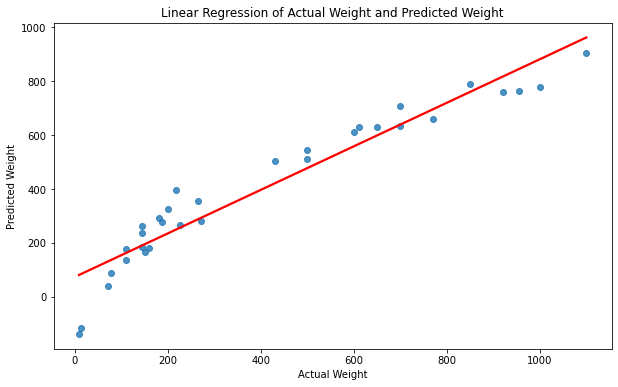

In [564]:
plt.figure()
sns.regplot(x=y_test_lr , y=reg_lr.predict(X_test_lr) , ci=None ,line_kws={"color":"red"}) 
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Linear Regression of Actual Weight and Predicted Weight',)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Length1

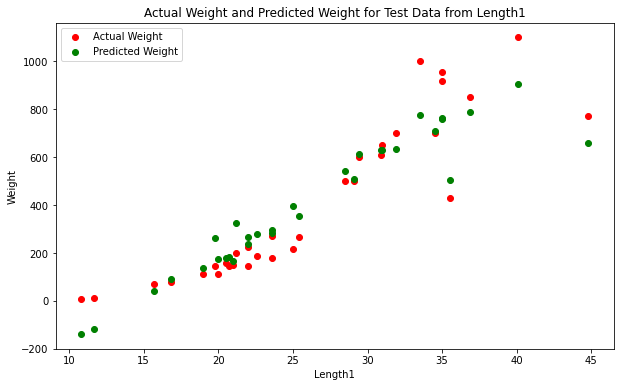

In [565]:
plt.scatter(X_test_lr['Length1'], y_test_lr, color='red', label = 'Actual Weight')
plt.scatter(X_test_lr['Length1'], reg_lr.predict(X_test_lr), color='green', label = 'Predicted Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Actual Weight and Predicted Weight for Test Data from Length1')
plt.legend()
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Length2

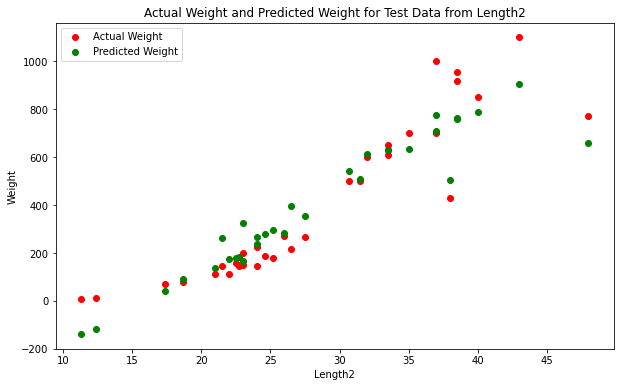

In [566]:
plt.scatter(X_test_lr['Length2'], y_test_lr, color='red', label = 'Actual Weight')
plt.scatter(X_test_lr['Length2'], reg_lr.predict(X_test_lr), color='green', label = 'Predicted Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.title('Actual Weight and Predicted Weight for Test Data from Length2')
plt.legend()
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Length3

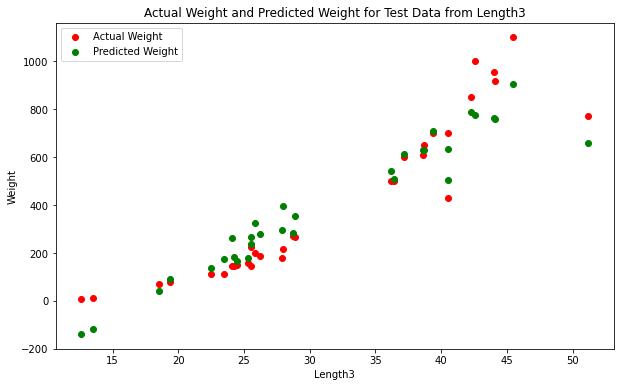

In [567]:
plt.scatter(X_test_lr['Length3'], y_test_lr, color='red', label = 'Actual Weight')
plt.scatter(X_test_lr['Length3'], reg_lr.predict(X_test_lr), color='green', label = 'Predicted Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.title('Actual Weight and Predicted Weight for Test Data from Length3')
plt.legend()
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Height

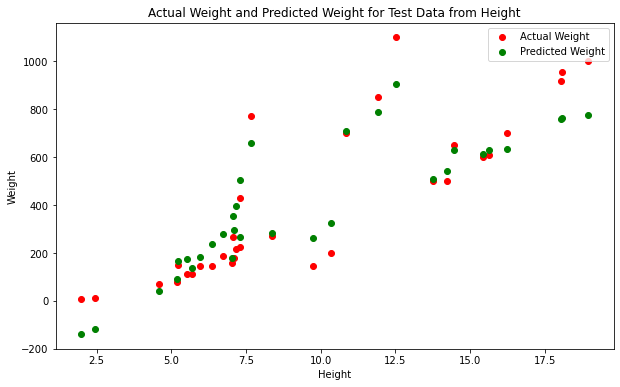

In [568]:
plt.scatter(X_test_lr['Height'], y_test_lr, color='red', label = 'Actual Weight')
plt.scatter(X_test_lr['Height'], reg_lr.predict(X_test_lr), color='green', label = 'Predicted Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Actual Weight and Predicted Weight for Test Data from Height')
plt.legend()
plt.show()

กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้จากค่า Width

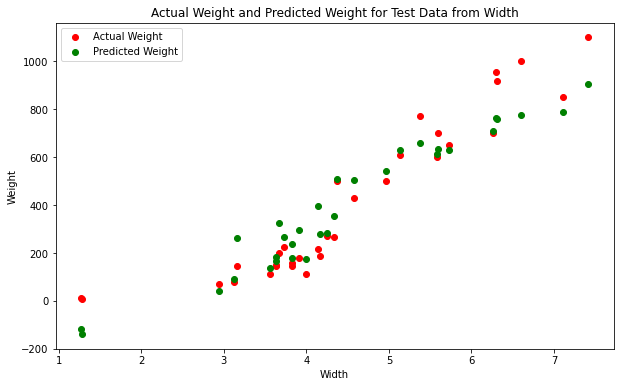

In [569]:
plt.scatter(X_test_lr['Width'], y_test_lr, color='red', label = 'Actual Weight')
plt.scatter(X_test_lr['Width'], reg_lr.predict(X_test_lr), color='green', label = 'Predicted Weight')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Actual Weight and Predicted Weight for Test Data from Width')
plt.legend()
plt.show()

แบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 70% และ test set 30%

In [570]:
X_train_lr1, X_test_lr1, y_train_lr1, y_test_lr1 = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [571]:
print(f'Train data: {X_train_lr1.shape}')
print(f'Train target: {y_train_lr1.shape}')
print(f'Test data: {X_test_lr1.shape}')
print(f'Test target: {y_test_lr1.shape}')

Train data: (109, 5)
Train target: (109, 1)
Test data: (47, 5)
Test target: (47, 1)


In [572]:
from sklearn.linear_model import LinearRegression

In [573]:
reg_lr1 = LinearRegression()

In [574]:
reg_lr1.fit(X_train_lr1, y_train_lr1)

LinearRegression()

In [575]:
reg_lr1.coef_

array([[120.34509044, -61.17858882, -35.22991173,  34.14060743,
         38.10723795]])

In [576]:
y_pred_lr1 = reg_lr1.predict(X_test_lr1)
y_pred_lr1

array([[ 266.2441448 ],
       [ 322.53856418],
       [ 133.39031697],
       [  36.3269938 ],
       [ 703.31973506],
       [ 760.42442995],
       [ 167.78646271],
       [ 538.37605205],
       [ 185.84101898],
       [ 712.62102305],
       [ 624.66517314],
       [ 168.29018829],
       [ 604.01952463],
       [ 896.4448434 ],
       [ 632.82857816],
       [ 753.61012439],
       [ 775.86028283],
       [ 398.03373599],
       [-100.42065151],
       [  85.26595311],
       [ 274.85190861],
       [ 633.10136951],
       [ 523.18799714],
       [ 545.46373672],
       [ 758.19620467],
       [ 356.59077853],
       [ 265.60756855],
       [ 280.81894787],
       [ 300.75719793],
       [ 238.79000545],
       [ 179.38530728],
       [-124.53525382],
       [ 281.27550541],
       [ 715.04232094],
       [ 845.88642893],
       [ 321.45339972],
       [ 922.88193748],
       [ 214.28565139],
       [ 143.72865253],
       [ 664.57307793],
       [ 618.45510617],
       [  98.982

In [577]:
from sklearn.metrics import mean_squared_error
score_lr1 = mean_squared_error(y_test_lr1, y_pred_lr1)
score_lr1

10999.03082511953

In [578]:
y_pred_lr1 = reg_lr1.predict(X_test_lr1)
r_squared_lr1 = float(r2_score(y_pred_lr1, y_test_lr1))
mae_lr1 = float(mean_absolute_error(y_pred_lr1, y_test_lr1))
mse_lr1 = float(mean_squared_error(y_pred_lr1,y_test_lr1))
rmse_lr1 = float(sqrt(mean_squared_error(y_pred_lr1, y_test_lr1)))

print('R2 = %.4f' %(r_squared_lr1))
print('MAE = %.3f' % (mae_lr1))
print('MSE = %.3f'%(mse_lr1))
print('RMSE = %.3f' % (rmse_lr1))

R2 = 0.8557
MAE = 81.170
MSE = 10999.031
RMSE = 104.876


แบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 60% และ test set 40%

In [579]:
X_train_lr2, X_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(X,
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=42)

In [580]:
print(f'Train data: {X_train_lr2.shape}')
print(f'Train target: {y_train_lr2.shape}')
print(f'Test data: {X_test_lr2.shape}')
print(f'Test target: {y_test_lr2.shape}')

Train data: (93, 5)
Train target: (93, 1)
Test data: (63, 5)
Test target: (63, 1)


In [581]:
from sklearn.linear_model import LinearRegression

In [582]:
reg_lr2 = LinearRegression()

In [583]:
reg_lr2.fit(X_train_lr2, y_train_lr2)

LinearRegression()

In [584]:
reg_lr2.coef_

array([[111.20092073, -52.24565228, -36.07785412,  33.55395345,
         37.38660039]])

In [585]:
y_pred_lr2 = reg_lr2.predict(X_test_lr2)
y_pred_lr2

array([[ 266.79620838],
       [ 319.47051285],
       [ 138.17991401],
       [  43.61561935],
       [ 690.00195233],
       [ 748.52873387],
       [ 170.68461738],
       [ 527.21049617],
       [ 188.62302908],
       [ 695.86612599],
       [ 610.93253201],
       [ 171.80326043],
       [ 592.33077812],
       [ 878.53066653],
       [ 621.80273157],
       [ 740.87925848],
       [ 763.688072  ],
       [ 391.13571917],
       [ -94.50905228],
       [  92.85601444],
       [ 274.69286587],
       [ 620.11580487],
       [ 512.31267462],
       [ 532.39776814],
       [ 745.53280671],
       [ 354.13552697],
       [ 264.10596192],
       [ 280.87682335],
       [ 295.35226081],
       [ 239.80711235],
       [ 180.50598642],
       [-119.20360797],
       [ 280.85621399],
       [ 697.47101567],
       [ 830.08725145],
       [ 316.37194236],
       [ 903.70848421],
       [ 214.3205167 ],
       [ 143.78329439],
       [ 652.11581958],
       [ 602.2881976 ],
       [ 104.713

In [586]:
from sklearn.metrics import mean_squared_error
score_lr2 = mean_squared_error(y_test_lr2, y_pred_lr2)
score_lr2

11045.542561970165

In [587]:
y_pred_lr2 = reg_lr2.predict(X_test_lr2)
r_squared_lr2 = float(r2_score(y_pred_lr2, y_test_lr2))
mae_lr2 = float(mean_absolute_error(y_pred_lr2, y_test_lr2))
mse_lr2 = float(mean_squared_error(y_pred_lr2,y_test_lr2))
rmse_lr2 = float(sqrt(mean_squared_error(y_pred_lr2, y_test_lr2)))

print('R2 = %.4f' %(r_squared_lr2))
print('MAE = %.3f' % (mae_lr2))
print('MSE = %.3f'%(mse_lr2))
print('RMSE = %.3f' % (rmse_lr2))

R2 = 0.8560
MAE = 82.635
MSE = 11045.543
RMSE = 105.098


#  Model 2 Random Forest Regression

Random Forest เป็นการเพิ่มจำนวน Tree เป็น Tree หลายๆ ต้น ทำให้ประสิทธิภาพในการทำงานสูงขึ้น แม่นยำมากขึ้น ซึ่งโมเดล Random Forest เป็นโมเดลที่ได้รับความนิยมไปอย่างมากในการใช้ Machine Learning

In [588]:
X = df1[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [589]:
y = df1[['Weight']]
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


สร้างโมเดล Random Forest Regression

Import โมเดลที่ต้องการใช้

In [590]:
from sklearn.ensemble import RandomForestRegressor

จากการทำ train test split dataset แบ่งชุดข้อมูลด้านบน จึงสรุปได้ว่าอัตราส่วน 80:20 มีค่าความแม่นยำ (R2) มากที่สุดจึงเลือกใช้ อัตราส่วนนี้ในการทำโมเดลแบบต่าง ๆ

แบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 80% และ test set 20%

In [591]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [592]:
print(f'Train dimension: {X_train1.shape}')
print(f'Train dimension: {y_train1.shape}')
print(f'Test dimension: {X_test1.shape}')
print(f'Test dimension: {y_test1.shape}')

Train dimension: (124, 5)
Train dimension: (124, 1)
Test dimension: (32, 5)
Test dimension: (32, 1)


สร้าง Instance ของแบบจำลอง

เทรนโมเดลด้วยคำสั่ง fit

In [593]:
rf_model = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=42)
rf_model.fit(X_train1, y_train1.values.ravel())

RandomForestRegressor(n_jobs=-1, random_state=42)

ทำนายบนข้อมูลใหม่ (หรือ ข้อมูลทดสอบ)

In [594]:
y_pred1 = rf_model.predict(X_test1)
y_pred1

array([ 168.12 ,  162.1  ,  123.17 ,   81.25 ,  686.08 ,  851.92 ,
        136.88 ,  367.12 ,  136.36 ,  751.34 ,  651.21 ,  152.11 ,
        586.77 , 1003.8  ,  680.2  ,  877.22 ,  935.85 ,  262.49 ,
         11.487,   82.21 ,  202.15 ,  544.97 ,  371.09 ,  473.85 ,
        876.22 ,  263.55 ,  147.04 ,  276.04 ,  226.7  ,  165.07 ,
        152.93 ,    9.624])

คำนวณ MSE ระหว่างข้อมูลทดสอบ กับ สิ่งที่โมเดล Random Forest Regression ทำนาย

In [595]:
from sklearn.metrics import mean_squared_error
score1 = mean_squared_error(y_test1, y_pred1)
score1

2657.9283764062507

คำนวณค่า R2, MAE, MSE, RMSE เพื่อหาค่าความแม่นยำและค่าคลาดเคลื่อนของโมเดล

In [596]:
y_pred1 = rf_model.predict(X_test1)
r_squared1 = float(r2_score(y_pred1, y_test1))
mae1 = float(mean_absolute_error(y_pred1, y_test1))
mse1 = float(mean_squared_error(y_pred1,y_test1))
rmse1 = float(sqrt(mean_squared_error(y_pred1, y_test1)))

print('R2 = %.3f' %(r_squared1))
print('MAE = %.3f' % (mae1))
print('MSE = %.3f'%(mse1))
print('RMSE = %.3f' % (rmse1))

R2 = 0.971
MAE = 35.425
MSE = 2657.928
RMSE = 51.555


In [597]:
y_pred1 = pd.DataFrame(y_pred1, columns=['Estimate Weight (RF)'])
y_pred1


,Estimate Weight (RF)
0,168.120
1,162.100
2,123.170
3,81.250
4,686.080
5,851.920
6,136.880
7,367.120
8,136.360
9,751.340


In [598]:
y_test1 = pd.DataFrame(y_test1)
y_test1 = y_test1.reset_index(drop=True)
y_test1

,Weight
0,225.0
1,200.0
2,110.0
3,70.0
4,700.0
5,1000.0
6,150.0
7,430.0
8,145.0
9,770.0


In [599]:
y_new1 = pd.concat([y_test1, y_pred1], axis=1)
y_new1

,Weight,Estimate Weight (RF)
0,225.0,168.120
1,200.0,162.100
2,110.0,123.170
3,70.0,81.250
4,700.0,686.080
5,1000.0,851.920
6,150.0,136.880
7,430.0,367.120
8,145.0,136.360
9,770.0,751.340


กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้

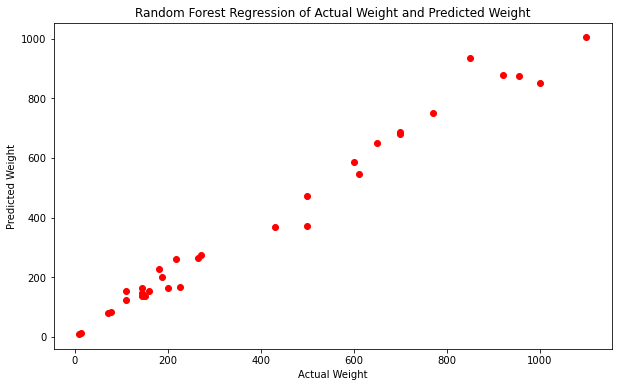

In [600]:
y_pred1 = rf_model.predict(X_test1)
plt.scatter(y_test1, y_pred1, color='red')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest Regression of Actual Weight and Predicted Weight')
plt.show()

# Model 3 Lasso Regression

Lasso regression จะเป็นการทำ Regularization ที่แตกต่างจาก Ridge regression เพราะว่า penalty term นั้นไม่ได้นำค่า coefficient มายกกำลัง ข้อดีของ Lasso คือ จะมีการกดตัวแปรที่ไม่สำคัญ และเหลือเฉพาะตัวแปรที่เด่น ๆ เท่านั้น

In [601]:
X = df1[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [602]:
y = df1[['Weight']]
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


สร้างโมเดล Lasso Regression

Import โมเดลที่ต้องการใช้

In [603]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

จากการทำ train test split dataset แบ่งชุดข้อมูลด้านบน จึงสรุปได้ว่าอัตราส่วน 80:20 มีค่าความแม่นยำ (R2) มากที่สุดจึงเลือกใช้ อัตราส่วนนี้ในการทำโมเดลแบบต่าง ๆ

แบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 80% และ test set 20%

In [604]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [605]:
print(f'Train data: {X_train2.shape}')
print(f'Train target: {y_train2.shape}')
print(f'Test data: {X_test2.shape}')
print(f'Test target: {y_test2.shape}')

Train data: (124, 5)
Train target: (124, 1)
Test data: (32, 5)
Test target: (32, 1)


สร้าง Instance ของแบบจำลอง

เทรนโมเดลด้วยคำสั่ง fit

In [606]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train2, y_train2)

Lasso()

ทำนายบนข้อมูลใหม่ (หรือ ข้อมูลทดสอบ)

In [607]:
y_pred2 = lasso_model.predict(X_test2)
y_pred2

array([ 271.93331811,  315.71486081,  155.80253917,   56.08692245,
        696.77694778,  790.14924158,  181.15939141,  504.18900026,
        199.61088244,  669.37792114,  618.3556892 ,  192.86868373,
        606.73260894,  892.57578675,  641.89738341,  771.69156346,
        794.60205429,  372.48236662, -126.5176477 ,  110.14356189,
        285.55502605,  619.75557909,  501.83227433,  527.0190043 ,
        776.0776838 ,  358.66457547,  255.00388649,  300.49816211,
        281.98170125,  247.86347889,  193.8635848 , -153.56251858])

คำนวณ MSE ระหว่างข้อมูลทดสอบ กับ สิ่งที่โมเดล Lasso Regression ทำนาย

In [608]:
from sklearn.metrics import mean_squared_error
score2 = mean_squared_error(y_test2, y_pred2)
score2

9937.113339133886

คำนวณค่า R2, MAE, MSE, RMSE เพื่อหาค่าความแม่นยำและค่าคลาดเคลื่อนของโมเดล

In [609]:
y_pred2 = lasso_model.predict(X_test2)
r_squared2 = float(r2_score(y_pred2, y_test2))
mae2 = float(mean_absolute_error(y_pred2, y_test2))
mse2 = float(mean_squared_error(y_pred2,y_test2))
rmse2 = float(sqrt(mean_squared_error(y_pred2, y_test2)))

print('R2 = %.4f' %(r_squared2))
print('MAE = %.3f' % (mae2))
print('MSE = %.3f'%(mse2))
print('RMSE = %.3f' % (rmse2))

R2 = 0.8647
MAE = 80.102
MSE = 9937.113
RMSE = 99.685


In [610]:
y_pred2 = pd.DataFrame(y_pred2, columns=['Estimate Weight (Lasso)'])
y_pred2

,Estimate Weight (Lasso)
0,271.933318
1,315.714861
2,155.802539
3,56.086922
4,696.776948
5,790.149242
6,181.159391
7,504.189000
8,199.610882
9,669.377921


In [611]:
y_test2 = pd.DataFrame(y_test2)
y_test2 = y_test2.reset_index(drop=True)
y_test2

,Weight
0,225.0
1,200.0
2,110.0
3,70.0
4,700.0
5,1000.0
6,150.0
7,430.0
8,145.0
9,770.0


In [612]:
y_new2 = pd.concat([y_test2, y_pred2], axis=1)
y_new2

,Weight,Estimate Weight (Lasso)
0,225.0,271.933318
1,200.0,315.714861
2,110.0,155.802539
3,70.0,56.086922
4,700.0,696.776948
5,1000.0,790.149242
6,150.0,181.159391
7,430.0,504.189000
8,145.0,199.610882
9,770.0,669.377921


กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้

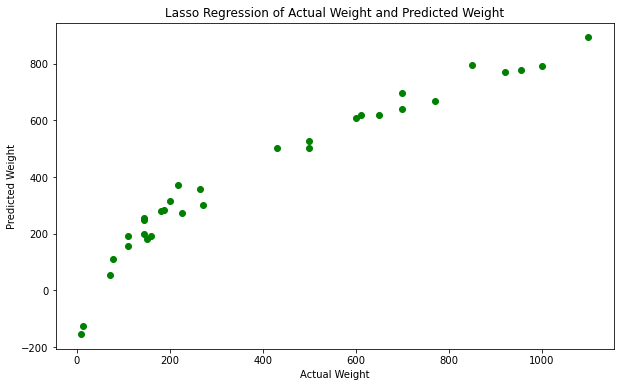

In [613]:
y_pred2 = lasso_model.predict(X_test2)
plt.scatter(y_test2, y_pred2, color='green')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Lasso Regression of Actual Weight and Predicted Weight')
plt.show()

# Model 4 Ridge Regression

ป็นหนึ่ง model ของการทำ regularization เพื่อป้องกัน overfitting เพื่อหาจุดสมดุลของ model ที่มี low bias และ low variance ซึ่งจะมีการใส่ Penalty term ไม่ให้ model fit มากเกินไป

In [614]:
X = df1[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [615]:
y = df1[['Weight']]
y

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0
...,...
154,12.2
155,13.4
156,12.2
157,19.7


สร้างโมเดล Ridge Regression

Import โมเดลที่ต้องการใช้

In [616]:
from sklearn.linear_model import Ridge

จากการทำ train test split dataset แบ่งชุดข้อมูลด้านบน จึงสรุปได้ว่าอัตราส่วน 80:20 มีค่าความแม่นยำ (R2) มากที่สุดจึงเลือกใช้ อัตราส่วนนี้ในการทำโมเดลแบบต่าง ๆ

แบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 80% และ test set 20%

In [617]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [618]:
print(f'Train data: {X_train3.shape}')
print(f'Train target: {y_train3.shape}')
print(f'Test data: {X_test3.shape}')
print(f'Test target: {y_test3.shape}')

Train data: (124, 5)
Train target: (124, 1)
Test data: (32, 5)
Test target: (32, 1)


สร้าง Instance ของแบบจำลอง

เทรนโมเดลด้วยคำสั่ง fit

In [619]:
ridge = Ridge()
ridge.fit(X_train3, y_train3)

Ridge()

ทำนายบนข้อมูลใหม่ (หรือ ข้อมูลทดสอบ)

In [620]:
y_pred3 = ridge.predict(X_test3)
y_pred3

array([[ 269.05748981],
       [ 321.90205837],
       [ 144.83737789],
       [  46.68008612],
       [ 703.75307729],
       [ 784.1100708 ],
       [ 171.61652396],
       [ 504.05575036],
       [ 191.56622638],
       [ 662.9689732 ],
       [ 624.13400788],
       [ 182.55949035],
       [ 610.3989975 ],
       [ 900.3937796 ],
       [ 637.62741287],
       [ 765.45381067],
       [ 792.1380307 ],
       [ 385.78877783],
       [-120.53709739],
       [  99.50369261],
       [ 281.56342354],
       [ 626.42019941],
       [ 507.17967417],
       [ 536.18560229],
       [ 770.1923427 ],
       [ 357.07212811],
       [ 261.000695  ],
       [ 289.46307418],
       [ 288.11949886],
       [ 242.55078236],
       [ 185.35242465],
       [-145.33428445]])

คำนวณ MSE ระหว่างข้อมูลทดสอบ กับ สิ่งที่โมเดล Ridge Regression ทำนาย

In [621]:
from sklearn.metrics import mean_squared_error
score3 = mean_squared_error(y_test3, y_pred3)
score3

10023.283336023955

คำนวณค่า R2, MAE, MSE, RMSE เพื่อหาค่าความแม่นยำและค่าคลาดเคลื่อนของโมเดล

In [622]:
y_pred3 = ridge.predict(X_test3)
r_squared3 = float(r2_score(y_pred3, y_test3))
mae3 = float(mean_absolute_error(y_pred3, y_test3))
mse3 = float(mean_squared_error(y_pred3,y_test3))
rmse3 = float(sqrt(mean_squared_error(y_pred3, y_test3)))

print('R2 = %.4f' %(r_squared3))
print('MAE = %.3f' % (mae3))
print('MSE = %.3f'%(mse3))
print('RMSE = %.3f' % (rmse3))

R2 = 0.8648
MAE = 79.694
MSE = 10023.283
RMSE = 100.116


In [623]:
y_pred3 = pd.DataFrame(y_pred3, columns=['Estimate Weight (Ridge)'])
y_pred3

,Estimate Weight (Ridge)
0,269.057490
1,321.902058
2,144.837378
3,46.680086
4,703.753077
5,784.110071
6,171.616524
7,504.055750
8,191.566226
9,662.968973


In [624]:
y_test3 = pd.DataFrame(y_test3)
y_test3 = y_test3.reset_index(drop=True)
y_test3

,Weight
0,225.0
1,200.0
2,110.0
3,70.0
4,700.0
5,1000.0
6,150.0
7,430.0
8,145.0
9,770.0


In [625]:
y_new3 = pd.concat([y_test3, y_pred3], axis=1)
y_new3

,Weight,Estimate Weight (Ridge)
0,225.0,269.057490
1,200.0,321.902058
2,110.0,144.837378
3,70.0,46.680086
4,700.0,703.753077
5,1000.0,784.110071
6,150.0,171.616524
7,430.0,504.055750
8,145.0,191.566226
9,770.0,662.968973


กราฟแสดงการเปรียบเทียบระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้

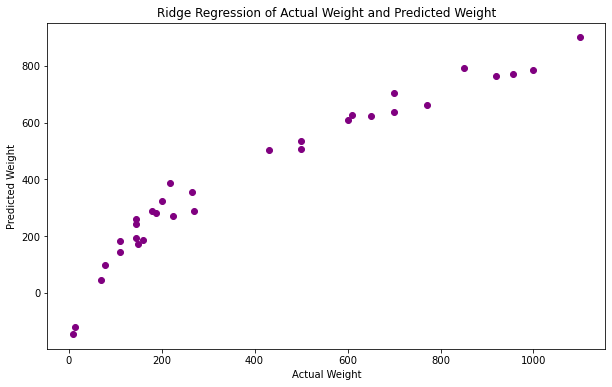

In [626]:
y_pred3 = ridge.predict(X_test3)
plt.scatter(y_test3, y_pred3, color='purple')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Ridge Regression of Actual Weight and Predicted Weight')
plt.show()

# 3 Result

ตารางเปรียบเทียบระหว่างการแบ่งชุดข้อมูลแบบ 80:20, 70:30 และ 60:40

In [627]:
compare = pd.DataFrame({'Linear Regression (80:20)': [r_squared_lr, mae_lr, mse_lr, rmse_lr],
                        'Linear Regression (70:30)': [r_squared_lr1, mae_lr1, mse_lr1, rmse_lr1], 
                        'Linear Regression (60:40)': [r_squared_lr2, mae_lr2, mse_lr2, rmse_lr2], },index=['R2', 'MAE', 'MSE', 'RMSE'])
compare.round(4)

,Linear Regression (80:20),Linear Regression (70:30),Linear Regression (60:40)
R2,0.8637,0.8557,0.8560
MAE,79.4019,81.1697,82.6348
MSE,10168.1001,10999.0308,11045.5426
RMSE,100.8370,104.8763,105.0978


พบว่าการแบ่งชุดข้อมูลแบบ training set 80% และ test set 20% ให้ผลลัพธ์คือค่าความแม่นยำ(R2)และค่าความคลาดเคลื่อน(RMSE)ของโมเดลดีกว่าการแบ่งชุดข้อมูลแบบ 70:30 และ 60:40

แสดงผลลัพธ์ที่ได้จากวิธีต่าง ๆ โดยการแบ่งข้อมูลเป็น 2 ส่วน คือส่วน training set 80% และ test set 20%

# Linear regression

กราฟแสดงความสัมพันธ์ระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ จากกราฟจะแสดงเห็นว่าน้ำหนักจริงกับน้ำหนักที่ทำนายได้แปรผันตรงกัน ถ้าน้ำหนักจริงมีค่าน้อยมากเท่าใด น้ำหนักที่ทำนายได้ก็จะมีค่าน้อยตามน้ำหนักจริงไปด้วย

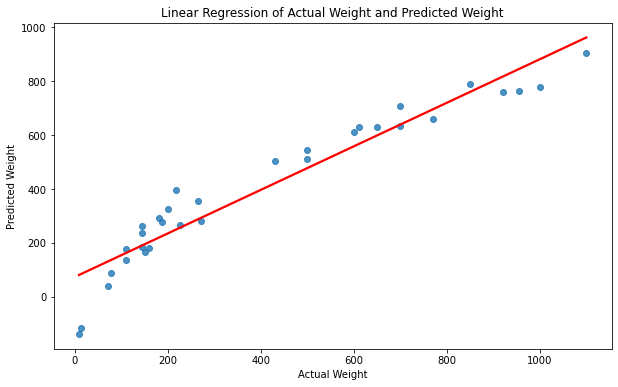

In [628]:
plt.figure()
sns.regplot(x=y_test_lr, y=reg_lr.predict(X_test_lr) , ci=None ,line_kws={"color":"red"}) 
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Linear Regression of Actual Weight and Predicted Weight',)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

ค่าความแม่นยำและค่าความคลาดเคลื่อนของโมเดล

In [629]:
y_pred_lr = reg_lr.predict(X_test_lr)
r_squared_lr = float(r2_score(y_pred_lr, y_test_lr))
mae_lr = float(mean_absolute_error(y_pred_lr, y_test_lr))
mse_lr = float(mean_squared_error(y_pred_lr,y_test_lr))
rmse_lr = float(sqrt(mean_squared_error(y_pred_lr, y_test_lr)))

print('R2 = %.4f' %(r_squared_lr))
print('MAE = %.3f' % (mae_lr))
print('MSE = %.3f'%(mse_lr))
print('RMSE = %.3f' % (rmse_lr))

R2 = 0.8637
MAE = 79.402
MSE = 10168.100
RMSE = 100.837


# Random forest regression

กราฟแสดงความสัมพันธ์ระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ จากกราฟจะแสดงเห็นว่าน้ำหนักจริงกับน้ำหนักที่ทำนายได้แปรผันตรงกัน ถ้าน้ำหนักจริงมีค่าน้อยมากเท่าใด น้ำหนักที่ทำนายได้ก็จะมีค่าน้อยตามน้ำหนักจริงไปด้วย

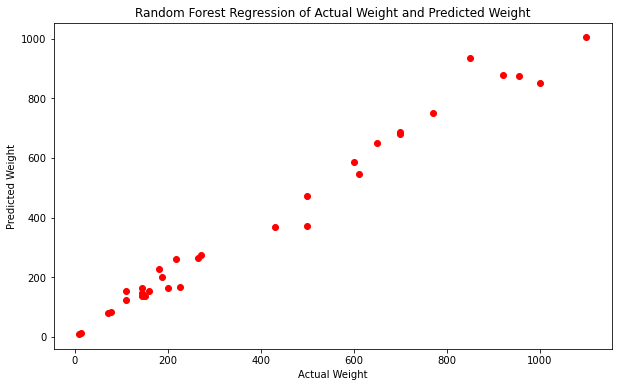

In [630]:
y_pred1 = rf_model.predict(X_test1)
plt.scatter(y_test1, y_pred1, color='red')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Random Forest Regression of Actual Weight and Predicted Weight')
plt.show()

ค่าความแม่นยำและค่าความคลาดเคลื่อนของโมเดล

In [631]:
y_pred1 = rf_model.predict(X_test1)
r_squared1 = float(r2_score(y_pred1, y_test1))
mae1 = float(mean_absolute_error(y_pred1, y_test1))
mse1 = float(mean_squared_error(y_pred1,y_test1))
rmse1 = float(sqrt(mean_squared_error(y_pred1, y_test1)))

print('R2 = %.4f' %(r_squared1))
print('MAE = %.3f' % (mae1))
print('MSE = %.3f'%(mse1))
print('RMSE = %.3f' % (rmse1))

R2 = 0.9708
MAE = 35.425
MSE = 2657.928
RMSE = 51.555


# Lasso Regression

กราฟแสดงความสัมพันธ์ระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ จากกราฟจะแสดงเห็นว่าน้ำหนักจริงกับน้ำหนักที่ทำนายได้แปรผันตรงกัน ถ้าน้ำหนักจริงมีค่าน้อยมากเท่าใด น้ำหนักที่ทำนายได้ก็จะมีค่าน้อยตามน้ำหนักจริงไปด้วย

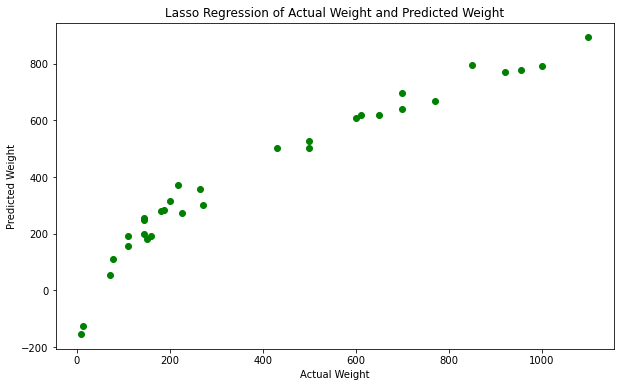

In [632]:
y_pred2 = lasso_model.predict(X_test2)
plt.scatter(y_test2, y_pred2, color='green')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Lasso Regression of Actual Weight and Predicted Weight')
plt.show()

ค่าความแม่นยำและค่าความคลาดเคลื่อนของโมเดล

In [633]:
y_pred2 = lasso_model.predict(X_test2)
r_squared2 = float(r2_score(y_pred2, y_test2))
mae2 = float(mean_absolute_error(y_pred2, y_test2))
mse2 = float(mean_squared_error(y_pred2,y_test2))
rmse2 = float(sqrt(mean_squared_error(y_pred2, y_test2)))

print('R2 = %.4f' %(r_squared2))
print('MAE = %.3f' % (mae2))
print('MSE = %.3f'%(mse2))
print('RMSE = %.3f' % (rmse2))

R2 = 0.8647
MAE = 80.102
MSE = 9937.113
RMSE = 99.685


# Ridge Regression

กราฟแสดงความสัมพันธ์ระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้ จากกราฟจะแสดงเห็นว่าน้ำหนักจริงกับน้ำหนักที่ทำนายได้แปรผันตรงกัน ถ้าน้ำหนักจริงมีค่าน้อยมากเท่าใด น้ำหนักที่ทำนายได้ก็จะมีค่าน้อยตามน้ำหนักจริงไปด้วย

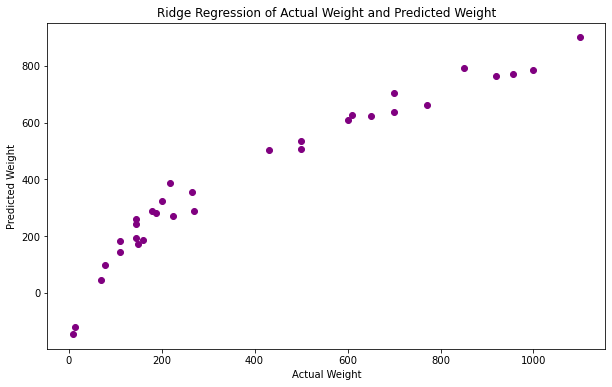

In [634]:
y_pred3 = ridge.predict(X_test3)
plt.scatter(y_test3, y_pred3, color='purple')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Ridge Regression of Actual Weight and Predicted Weight')
plt.show()

ค่าความแม่นยำและค่าความคลาดเคลื่อนของโมเดล

In [635]:
y_pred3 = ridge.predict(X_test3)
r_squared3 = float(r2_score(y_pred3, y_test3))
mae3 = float(mean_absolute_error(y_pred3, y_test3))
mse3 = float(mean_squared_error(y_pred3,y_test3))
rmse3 = float(sqrt(mean_squared_error(y_pred3, y_test3)))

print('R2 = %.4f' %(r_squared3))
print('MAE = %.3f' % (mae3))
print('MSE = %.3f'%(mse3))
print('RMSE = %.3f' % (rmse3))

R2 = 0.8648
MAE = 79.694
MSE = 10023.283
RMSE = 100.116


# 4 Conclusion

ตารางแสดงค่าน้ำหนักของปลาระหว่างน้ำหนักจริงกับน้ำหนักที่ทำนายได้

In [636]:
y_test_lr = pd.DataFrame(y_test_lr)
y_test_lr = y_test_lr.reset_index(drop=True)
y_pred_lr = pd.DataFrame(y_pred_lr, columns=['Estimate Weight (LR)'])
y_pred1 = pd.DataFrame(y_pred1, columns=['Estimate Weight (RF)'])
y_pred2 = pd.DataFrame(y_pred2, columns=['Estimate Weight (Lasso)'])
y_pred3 = pd.DataFrame(y_pred3, columns=['Estimate Weight (Ridge)'])
compare = pd.concat([y_test_lr, y_pred_lr, y_pred1, y_pred2, y_pred3], axis=1)

In [637]:
compare.head()

,Weight,Estimate Weight (LR),Estimate Weight (RF),Estimate Weight (Lasso),Estimate Weight (Ridge)
0,225.0,265.118210,168.12,271.933318,269.057490
1,200.0,324.654947,162.10,315.714861,321.902058
2,110.0,136.526379,123.17,155.802539,144.837378
3,70.0,39.256840,81.25,56.086922,46.680086
4,700.0,708.235895,686.08,696.776948,703.753077


In [638]:
compare.tail()

,Weight,Estimate Weight (LR),Estimate Weight (RF),Estimate Weight (Lasso),Estimate Weight (Ridge)
27,270.0,281.444718,276.040,300.498162,289.463074
28,180.0,293.890012,226.700,281.981701,288.119499
29,145.0,237.851202,165.070,247.863479,242.550782
30,160.0,180.576754,152.930,193.863585,185.352425
31,8.7,-138.449662,9.624,-153.562519,-145.334284


ตารางเปรียบเทียบค่าความแม่นยำและค่าความคลาดเคลื่อนของโมเดล

In [639]:
compare1 = pd.DataFrame({'Linear Regression': [r_squared_lr, mae_lr, mse_lr, rmse_lr],'Random Forest Regression': [r_squared1, mae1, mse1, rmse1], 'Lasso Regression': [r_squared2, mae2, mse2, rmse2], 'Ridge Regression': [r_squared3, mae3, mse3, rmse3],},index=['R2', 'MAE', 'MSE', 'RMSE'])
compare1.round(4)

,Linear Regression,Random Forest Regression,Lasso Regression,Ridge Regression
R2,0.8637,0.9708,0.8647,0.8648
MAE,79.4019,35.4252,80.1020,79.6944
MSE,10168.1001,2657.9284,9937.1133,10023.2833
RMSE,100.8370,51.5551,99.6851,100.1163


จากการที่ได้ศึกษาข้อมูลเรื่อง Fish Market และได้นำเทคนิค regression วิธีการต่าง ๆ มาใช้ทำนายน้ำหนักของปลา พบว่า Attribute ที่เราเลือกมานั้นมีความสัมพันธ์กับน้ำหนักของปลา ส่งผลให้น้ำหนักจริงและน้ำหนักที่ทำนายมีค่าแปรผันตรงกัน 

การนำ Linear regression มาใช้คือพบว่าโมเดลมีประสิทธิภาพ เพราะผลลัพธ์ที่ได้คือน้ำหนักที่ทำนายมีค่าใกล้เคียงกับน้ำหนักจริง เพราะมีค่า R2 ประมาณ 0.8637 ดังนั้นโมเดลจะมีค่าความแม่นยำถึง 0.8637 และมีค่า RMSE ประมาณ 100.8370 แสดงว่าจะมีค่าความคลาดเคลื่อนอยู่ที่ 100.8370

การนำ Random Forest regression มาใช้คือพบว่าโมเดลมีประสิทธิภาพ เพราะผลลัพธ์ที่ได้คือน้ำหนักที่ทำนายมีค่าใกล้เคียงกับน้ำหนักจริง เพราะมีค่า R2 ประมาณ 0.9708 ดังนั้นโมเดลจะมีค่าความแม่นยำถึง 0.9708 และมีค่า RMSE ประมาณ 51.5551 แสดงว่าจะมีค่าความคลาดเคลื่อนอยู่ที่ 51.5551

การนำ Lasso regression มาใช้คือพบว่าโมเดลมีประสิทธิภาพ เพราะผลลัพธ์ที่ได้คือน้ำหนักที่ทำนายมีค่าใกล้เคียงกับน้ำหนักจริง เพราะมีค่า R2 ประมาณ 0.8647 ดังนั้นโมเดลจะมีค่าความแม่นยำถึง 0.8647 และมีค่า RMSE ประมาณ 99.6851 แสดงว่าจะมีค่าความคลาดเคลื่อนอยู่ที่ 99.6851

การนำ Ridge regression มาใช้คือพบว่าโมเดลมีประสิทธิภาพ เพราะผลลัพธ์ที่ได้คือน้ำหนักที่ทำนายมีค่าใกล้เคียงกับน้ำหนักจริง เพราะมีค่า R2 ประมาณ 0.8648 ดังนั้นโมเดลจะมีค่าความแม่นยำถึง 0.8648 และมีค่า RMSE ประมาณ 100.1163 แสดงว่าจะมีค่าความคลาดเคลื่อนอยู่ที่ 100.1163

จากการสร้างโมเดลเพื่อทำนายน้ำหนักของปลา ทำให้ทราบว่าโมเดลที่ใช้วิธี Random Forest Regression มีประสิทธิภาพมากที่สุด มีความแม่นยำในการทำนายน้ำหนักของปลามากที่สุด เพราะมีค่าความคลาดเคลื่อน(RMSE)น้อยที่สุด และ มีค่าความแม่นยำ(R2)มากที่สุด ดังนั้นจึงสรุปได้ว่าเทคนิคนี้คือเทคนิคที่ทำให้น้ำหนักของปลาที่ทำนาย มีค่าใกล้เคียงกับน้ำหนักปลาจริงมากที่สุด